<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Центральная предельная теорема. 

Как применить законы статистики к данным ? 
Сколько элементов сумм использовано в коде?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

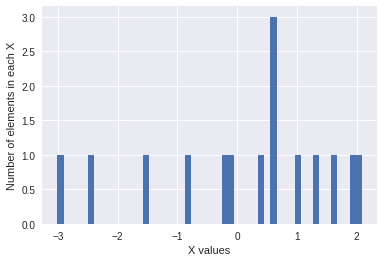

In [0]:
number_of_sums = ? - найти количество
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

### Ответ
Так как это гистограмма плотности, то по оси y отложена частота появления для каждого значения.
number_of_sums = 15


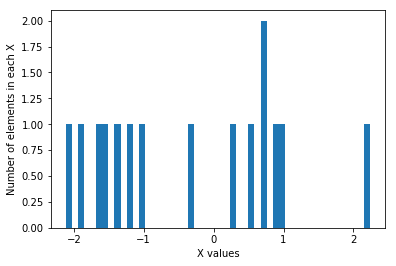

In [10]:
number_of_sums = 15
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
    X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

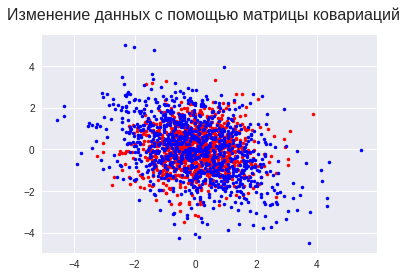

In [0]:
import numpy.linalg as la
n = 1000
C = ? # найти!
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

### Ответ
Данные изменились равномерно и симметрично по осиx и y --> изменился разброс данных - дисперсия. И появилась корреляция между x и y

1. Матрица А по условию получена с помощью преобразования Холецкого матрицы ковариации
С
[[Sxx, Rxy],
[Ryx, Syy]]

А
[[sqrt(Sxx) , 0],
[Rxy/sqrt(Sxx), sqrt(Syy-R^2/Sxx)]]

2. На графике видно, новые границы увеличились в 2 раза (2-->4, -2-->-4)
n = Sxx = Syy = 2
С
[[2, Rxy],
[Ryx, 2]]

А
[1.41 , 0],
[Rxy/1.41, sqrt(2-R^2/2)]

3. Угол поворота на графике визуально = -45 градусам.
-cos45 = -1.41/2
из А при проецировании Rxy/1.41 = cos45
Rxy = -1


In [172]:

C1 = [[2, -1], [-1, 2]]
B1 = np.linalg.eig(C1)

print(B1)

(array([3., 1.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


In [64]:
C = [[2, -1], [-1, 2]]
A = la.cholesky(C)
print(A)

[[ 1.41421356  0.        ]
 [-0.70710678  1.22474487]]


# Разброс данных 2 способами: теоритически и практически

Построить преобразование с помощью вычисленной выше матрицей

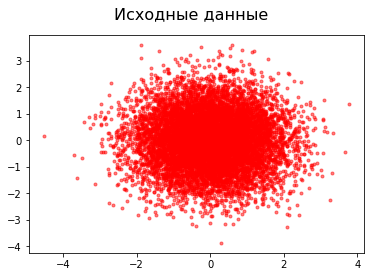

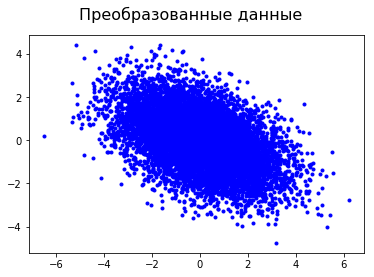

In [165]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(10000, 2)))
c = [[2, -1], [-1, 2]]
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker=".", alpha=1)
plt.show()

Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [0]:
theta = ? 
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = ?
var_theoretical = ?
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


In [66]:
import math

для С [[2, -1], [-1, 2]] угол поворота - 45 градусов

In [163]:
# 1000 элементов
theta = -45
u = np.matrix('{}; {}'.format(math.sin(math.radians(theta)), math.cos(math.radians(theta))))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)


генерация данных:  2.943778754970347
теоритический подсчет:  [[3.]]


In [164]:
# 1000 элементов
theta = (-45)*3.14/180
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = y*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*c*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)
print('diff', var_theoretical-var_empirical)

генерация данных:  2.943390528131725
теоритический подсчет:  [[2.99999968]]
diff [[0.05660915]]


При  большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?
### Ответ
абсолютное отклонение 0,02 или 2% от теоритического значения. Погрешность меньше 5%. Значит данных вполне достаточно.

Посчитать как меняется вариация в зависимости от выбора собственного вектора

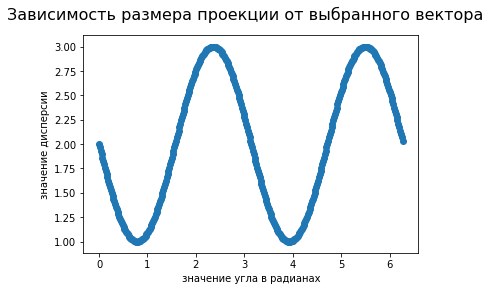

In [122]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

Максимальный разброс = 3, при угле 135 градусов (2.4 рад) или -45 градусов

# Работа с данными данные

Загрузить таблицу. 

In [173]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [174]:
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [175]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4770', '4225', '4046']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1         2
0  0.000019  0.002660  0.000046
1  0.000023  0.002181  0.000030
2  0.000051  0.005332  0.000035
3  0.000029  0.003516  0.000050
4  0.000030  0.002142  0.000041


In [178]:
vol_4770 = df_norm[0]
vol_4225 = df_norm[1]
vol_4046 = df_norm[2]

In [177]:
import seaborn as sns

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


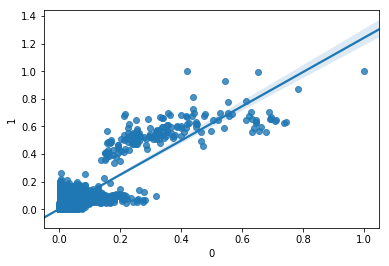

In [180]:
sns.regplot(x= vol_4770, y=vol_4225, fit_reg=True) 

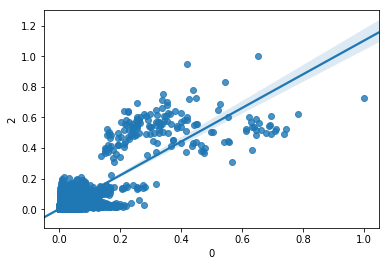

In [181]:
sns.regplot(x= vol_4770, y=vol_4046, fit_reg=True) 

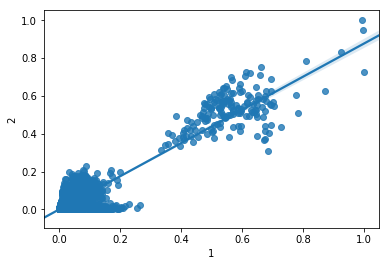

In [182]:
sns.regplot(x= vol_4225, y=vol_4046, fit_reg=True) 

Общий вывод:
на небольших объемах отдают предпочтение покупки одного вида авокадо - нижняя левая часть графика похоже на незавершенный квадрат. Корреляции в этом кластере должна быть ниже, чем по всей совокупности и в центральном кластере.
С ростом объема покупки увеличивается корреляция - центральный кластер. Сюда попадают оптовые покупатели, который приобретают одновременно несколько видов авокадо.

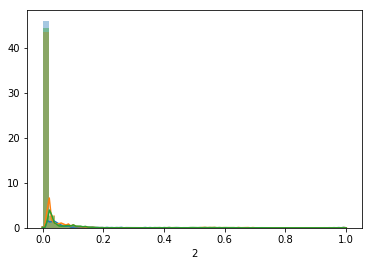

In [189]:
sns.distplot(vol_4770)
sns.distplot(vol_4225)
sns.distplot(vol_4046)

In [190]:
def sigma(p):
    '''
    для расчета среднеквадратического отклонения данных
    '''
    mu = p.mean()
    d = 0
    for j in p:
        s = ((j-mu)**2)
        d += s
    return (d / len(p))**(0.5)

In [214]:
vol_4046.size

18249

In [205]:
x_v = np.linspace(0, 1, num = 18249)

In [216]:
# считаем значение среднего х и среднеквадратического отклонения в масштабированной матрице
mu_4770 = vol_4770.mean()
sigma_4770 = sigma(vol_4770)

mu_4225 = vol_4225.mean()
sigma_4225 = sigma(vol_4225)

mu_4046 = vol_4046.mean()
sigma_4046 = sigma(vol_4046)

# строим по данным параметрам норм. распределение
norm_rv4770 = sts.norm(loc=mu_4770, scale=sigma_4770)
norm_rv4225 = sts.norm(loc=mu_4225, scale=sigma_4225)
norm_rv4046 = sts.norm(loc=mu_4046, scale=sigma_4046)

# считаем функцию плотности с помощью метода .pdf() по оси x_v
pdf_4770 = norm_rv4770.pdf(x_v)
pdf_4225 = norm_rv4225.pdf(x_v)
pdf_4046 = norm_rv4046.pdf(x_v)

Text(0.5, 0, '$x$')

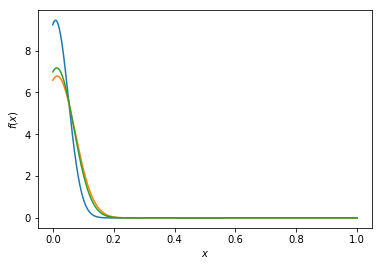

In [282]:
plt.plot(x_v, pdf_4770)
plt.plot(x_v, pdf_4225)
plt.plot(x_v, pdf_4046)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [229]:
corr = df_norm.corr()
corr

,0,1,2
0,1.000000,0.887855,0.833389
1,0.887855,1.000000,0.926110
2,0.833389,0.926110,1.000000


In [237]:
corr[0][0]

1.0

In [241]:
# матрица ковариации для 4770 и 4225
C1 = [[sigma(vol_4770), corr[0][1]], [corr[1][0], sigma(vol_4225)]]
C1

[[0.04220054726250432, 0.8878549976059646],
 [0.8878549976059646, 0.05882040684524329]]

In [242]:
# матрица ковариации для 4770 и 4046
C2 = [[sigma(vol_4770), corr[0][2]], [corr[2][0], sigma(vol_4046)]] 
C2

[[0.04220054726250432, 0.8333891041719086],
 [0.8333891041719086, 0.05561799903316405]]

In [243]:
# матрица ковариации для 4225 и 4046
C3 = [[sigma(vol_4225), corr[1][2]], [corr[2][1], sigma(vol_4046)]]
C3

[[0.05882040684524329, 0.9261099558992311],
 [0.9261099558992311, 0.05561799903316405]]

In [249]:
# получим собственное значение и собственный вектор для С1 методом eig
w1,v1 = la.eig(C1)
print(w1)
print(v1)

[-0.83738341  0.93840436]
[[-0.71040803 -0.70379004]
 [ 0.70379004 -0.71040803]]


У нас два собственных значения и соответственно 2 собственных вектора
Собственный вектор - это вектор , который при умножении на некоторую квадратную матрицу  превращается в самого же себя с числовым коэффициентом m.
Нужно найти определитель матрицы C1 через m, раскрыть определитель и решить квадратное уравнение
Корни этого уравнения и будут собственными значениями
Для нахождения векторов решаем систему линейных уравнений от m.

Метод Холецкого не применим, т.к. С1 не является положительно-определенной матрицой, определитель = - 0,85

# Поиск собственного вектора

-0.8373834083327895 [-0.71040803  0.70379004]


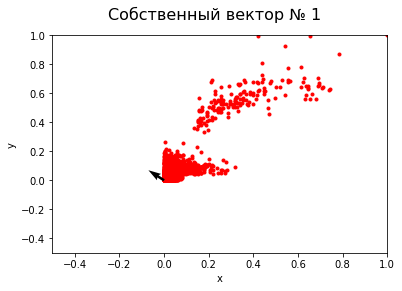

0.9384043624405369 [-0.70379004 -0.71040803]


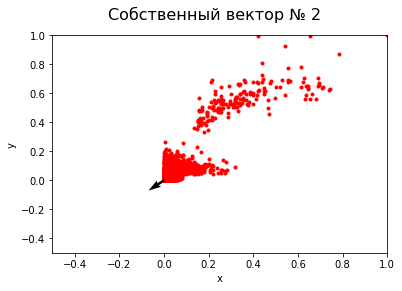

In [264]:
import numpy.linalg as la
n=1000
C1 = [[sigma(vol_4770), corr[0][1]], [corr[1][0], sigma(vol_4225)]]

w,v = la.eig(C1)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(vol_4770, vol_4225, 'r.', zorder=1)
    plt.axis([-0.5,1,-0.5,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

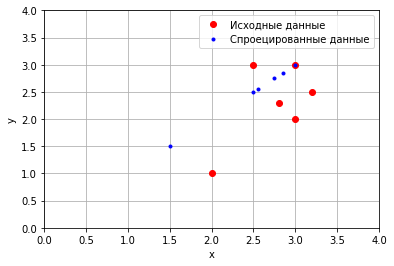

In [285]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую 

    
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,4,0,4])
plt.grid()
plt.legend()

### Ответ
[2,1]*P --> [3/2, 3/2]

[3,2]*P --> [5/2, 5/2] здесь аналогично проверка для 1 точки

[3, 3]*P -->[3, 3]

Matrix P, 
[[a, b],
[b, a]]

2a +b = 3/2
2b +a = 3/2

2a+b-3/2=0
2b+a-3/2=0

2a+b-2b-a = 0
a+b = 0
a=b

Matrix P, 
[[a, a],
[a, a]]

3a = 3/2
a = 1/2

[[1.5  1.5 ]
 [2.5  2.5 ]
 [3.   3.  ]
 [2.75 2.75]
 [2.55 2.55]
 [2.85 2.85]]


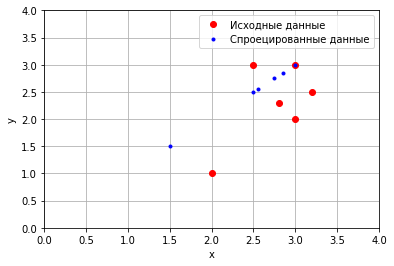

In [304]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую
P = np.array([[0.5, 0.5], [0.5, 0.5]])

Xp = np.dot(Xc,P)

print(Xp)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности

Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram. 

In [318]:
import random

In [333]:
#произвольно выбрать от 1 до 6
def cub():
    return random.choice([1, 2, 3, 4, 5, 6])

In [334]:
cub()

4

In [385]:
dict_cub = {'One': 0, 'Two': 0, 'Three': 0, 'Four': 0, 'Five': 0, 'Six': 0}

for i in range(1000):
    a = cub()
    if a == 1:
        dict_cub['One'] += 1
    elif a == 2:
        dict_cub['Two'] += 1
    elif a == 3:
        dict_cub['Three'] += 1 
    elif a == 4:
        dict_cub['Four'] += 1
    elif a == 5:
        dict_cub['Five'] += 1
    elif a == 6:
        dict_cub['Six'] += 1



df_cub = pd.DataFrame.from_dict(dict_cub, orient='index')

print(df_cub)



         0
One    172
Two    151
Three  172
Four   171
Five   153
Six    181


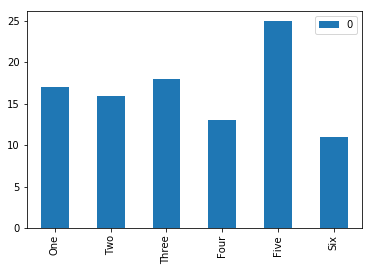

In [384]:
# 100
df_cub.plot(kind='bar')

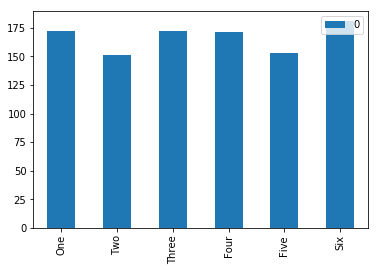

In [386]:
# 1000
# вероятность выбадения числа от 1 до 6 стремиться к 1/6 при увеличении наблюдений
df_cub.plot(kind='bar')

Проверяем утверждение об уменьшении корреляции между объемами покупки разных видов авокадо в нижнем кластере

In [401]:
df_norm_clean = df_norm[((df_norm[0] <= 0.3) & (df_norm[1] <= 0.3) & (df_norm[2] <= 0.3))]
df_norm_clean.head()

,0,1,2
0,0.000019,0.002660,0.000046
1,0.000023,0.002181,0.000030
2,0.000051,0.005332,0.000035
3,0.000029,0.003516,0.000050
4,0.000030,0.002142,0.000041


In [402]:
vol_4770_clean = df_norm_clean[0]
vol_4225_clean = df_norm_clean[1]
vol_4046_clean = df_norm_clean[2]

In [403]:
corr = df_norm_clean.corr()
corr

,0,1,2
0,1.000000,0.623888,0.507322
1,0.623888,1.000000,0.602583
2,0.507322,0.602583,1.000000


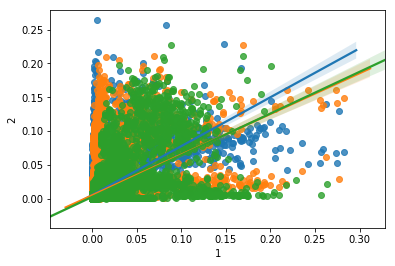

In [406]:
sns.regplot(x= vol_4770_clean, y=vol_4225_clean, fit_reg=True)
sns.regplot(x= vol_4770_clean, y=vol_4046_clean, fit_reg=True)
sns.regplot(x= vol_4225_clean, y=vol_4046_clean, fit_reg=True)

Коэффициенты корреляции действительно уменьшились.
Выше корреляция покупки соседних видов авокадо